#### Name: Sumanasekara W.K.G.G.
#### Index: 190610E

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

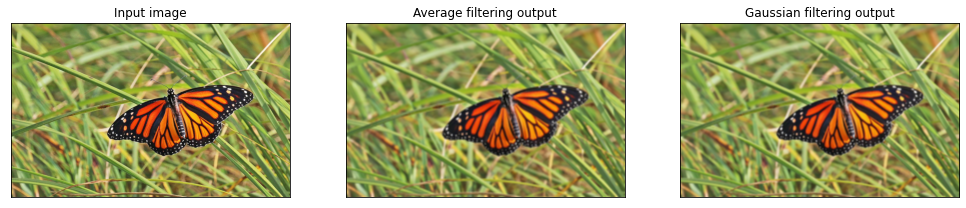

In [37]:
img_butterfly = cv.imread("butterfly.jpg", cv.IMREAD_COLOR)
img_butterfly = cv.cvtColor(img_butterfly, cv.COLOR_BGR2RGB)

kernal1 = np.ones((9, 9), np.float32)/81
averaged_output = cv.filter2D(img_butterfly, -1, kernal1)
gaussian_output = cv.GaussianBlur(img_butterfly, (9, 9), 4)

fig, ax = plt.subplots(1, 3, figsize = (17, 10))
ax[0].imshow(img_butterfly)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Input image")

ax[1].imshow(averaged_output)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Average filtering output")

ax[2].imshow(gaussian_output)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title("Gaussian filtering output")

plt.show()

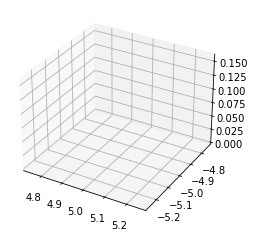

[[2.21033492e-12 1.98968008e-10 6.58891552e-09 8.02694235e-08
  3.59742598e-07 5.93115274e-07 3.59742598e-07 8.02694235e-08
  6.58891552e-09 1.98968008e-10 2.21033492e-12]
 [1.98968008e-10 1.79105293e-08 5.93115274e-07 7.22562324e-06
  3.23829967e-05 5.33905355e-05 3.23829967e-05 7.22562324e-06
  5.93115274e-07 1.79105293e-08 1.98968008e-10]
 [6.58891552e-09 5.93115274e-07 1.96412803e-05 2.39279779e-04
  1.07237757e-03 1.76805171e-03 1.07237757e-03 2.39279779e-04
  1.96412803e-05 5.93115274e-07 6.58891552e-09]
 [8.02694235e-08 7.22562324e-06 2.39279779e-04 2.91502447e-03
  1.30642333e-02 2.15392793e-02 1.30642333e-02 2.91502447e-03
  2.39279779e-04 7.22562324e-06 8.02694235e-08]
 [3.59742598e-07 3.23829967e-05 1.07237757e-03 1.30642333e-02
  5.85498315e-02 9.65323526e-02 5.85498315e-02 1.30642333e-02
  1.07237757e-03 3.23829967e-05 3.59742598e-07]
 [5.93115274e-07 5.33905355e-05 1.76805171e-03 2.15392793e-02
  9.65323526e-02 1.59154943e-01 9.65323526e-02 2.15392793e-02
  1.76805171e-03

In [39]:
calc_gaussian = lambda x, y, sigma : np.exp(-(x**2 + y**2)/(2*sigma**2)) / (2*np.pi*sigma**2)
X, Y, Z = np.zeros((11, 11)), np.zeros((11, 11)), np.zeros((11, 11))

for y in range(5, -6, -1):
    for x in range(-5, 6):
        Z[-y+5, x+5] = calc_gaussian(x, y, 1)
        X[-y+5, x+5] = x
        Y[-y+5, x+5] = y

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x, y, Z, cmap='viridis', edgecolor='none')
 
plt.show()

print(Z)

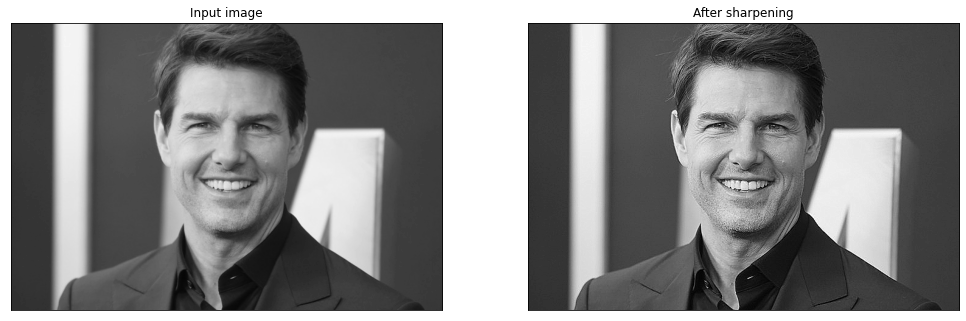

In [22]:
img_tom = cv.imread("tom.jpg", cv.IMREAD_GRAYSCALE)

kernal2 = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]))
tom_sharpen = cv.filter2D(img_tom, -1, kernal2)

fig, ax = plt.subplots(1, 2, figsize=(17,10))

ax[0].imshow(img_tom, cmap="gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Input image")

ax[1].imshow(tom_sharpen, cmap="gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("After sharpening")

plt.show()